In [1]:
from channels import Channel

In [2]:
class Error(Exception):
    """Base class for exceptions in this module."""
    pass

class InputError(Error):
    """Exception raised for errors in the input.

    Attributes:
        expression -- input expression in which the error occurred
        message -- explanation of the error
    """

    def __init__(self, expression, message):
        self.expression = expression
        self.message = message

In [3]:
from channels import BinarySymmetricChannel

In [4]:
bsc = BinarySymmetricChannel()

In [5]:
import numpy as np

In [6]:
x = np.ones(5)
print(x)

[1. 1. 1. 1. 1.]


In [7]:
y = bsc.dataIn(x)
print(y)

[0. 1. 1. 0. 0.]


In [8]:
bsc2 = BinarySymmetricChannel(p=0.1)
x2 = np.ones(1000)

In [9]:
bsc2.dataIn(x2)
print(bsc2.errorRate())

0.103


In [10]:
from channels import MIMOChannelLOS

In [11]:
ch = MIMOChannelLOS(3,3,2,1,10,1)
print(np.around(ch.getChannel(), decimals=-3))

[[5.69143366e+12-1193000.j 5.69143366e+12-1193000.j
  5.69143366e+12-1193000.j]
 [5.69143366e+12-1193000.j 5.69143366e+12-1241000.j
  5.69143366e+12-1288000.j]
 [5.69143366e+12-1193000.j 5.69143366e+12-1288000.j
  5.69143366e+12-1384000.j]]


In [12]:
x = np.ones(3)
ch.dataIn(x)

array([1.7074301e+13-3578508.86942768j, 1.7074301e+13-3721649.22420479j,
       1.7074301e+13-3864789.57898189j])

In [13]:
from channels import MIMOChannelUncorrelatedGaussian

In [14]:
ch2 = MIMOChannelUncorrelatedGaussian(3,3)

In [15]:
m = np.matrix([[1,2],[3,4]])
print(m)

[[1 2]
 [3 4]]


In [16]:
m.flatten('F')

matrix([[1, 3, 2, 4]])

In [17]:
m.reshape(2,2)

matrix([[1, 2],
        [3, 4]])

In [18]:
ch2 = MIMOChannelUncorrelatedGaussian(2,2)

In [19]:
print(ch2.getChannel())

[[ 0.52704366-0.66970764j -0.51790596+0.16161388j]
 [ 0.29829461+0.12743235j -0.00219703-0.63266761j]]


In [20]:
from channels import GeneralCorrelatedMIMOChannel
R = np.matrix([[1,0,0,0.2], [0,1,0.2,0], [0, 0.2, 1, 0], [0.2, 0, 0, 1]])
print(R)

[[1.  0.  0.  0.2]
 [0.  1.  0.2 0. ]
 [0.  0.2 1.  0. ]
 [0.2 0.  0.  1. ]]


In [21]:
chCorr = GeneralCorrelatedMIMOChannel(2,2,R)
print(chCorr.getChannel())

[[ 0.10878569-0.14035815j  0.82546833+0.45657937j]
 [-0.15248383-0.52686746j -0.36447735+0.0215268j ]]


In [22]:
from channels import KroneckerRayleighChannelMIMO

In [23]:
Rt = np.matrix([[1, 0.3], [0.3, 1]])
Rr = np.matrix([[1, 0.1], [0.1, 1]])

ch3 = KroneckerRayleighChannelMIMO(2,2, Rt, Rr)
print(ch3.getChannel())

[[-0.65631658+0.0251716j  -0.55185846+1.25208533j]
 [-0.46503929+0.70143576j -0.11227241+0.51684797j]]


In [24]:
Rt = np.array([[1]])
Rr = np.array([[1,0],[0,1]])

ch3 = KroneckerRayleighChannelMIMO(1,2, Rt, Rr)
print(ch3.getChannel())

[[-2.06191989+0.25021767j]
 [-0.7096429 +0.5237036j ]]


In [25]:
from channels import PinholeChannelMIMO

In [26]:
ch4 = PinholeChannelMIMO(2,2)
print(ch4.getChannel())

[[ 0.49115031-0.63664093j -0.38751509-1.19073739j]
 [-0.16741872-0.32957935j -0.57089877-0.07408897j]]


In [27]:
from channels import RayleighLOSChannelMIMO

In [28]:
ch5 = RayleighLOSChannelMIMO(2,2,10,25,100,1000, 2)

print(ch5.getChannel())

[[46470.28490051-97.06449262j 46469.96208921-97.44465183j]
 [46470.06611131-97.24596511j 46470.12836729-98.69642756j]]


In [29]:
from symbols import SymbolGenerator

In [30]:
generator = SymbolGenerator(symbols='8QAM')

In [31]:
print(generator.generate(5))

[ 2.73205081+0.j          1.        +1.j         -1.        +1.j
  0.        -2.73205081j  0.        -2.73205081j]


In [32]:
import cmath

Rt = np.matrix([1])
Rr = np.matrix([[1, 0.3], [0.3, 1]])
Rr = np.identity(2)
ch3 = KroneckerRayleighChannelMIMO(1,2, Rt, Rr)


generator2 = SymbolGenerator(symbols = 'QPSK')
s  = generator2.generate(20)
s = s.reshape((1,-1))
print('shape = ', s.shape)
H = ch3.getChannel()

print('H = ',H)
print('s = ', s)
print('y = ', ch3.dataIn(s))

shape =  (1, 20)
H =  [[0.80336667-0.57465745j]
 [1.93551162+0.72709591j]]
s =  [[-1.-1.j  1.-1.j  1.-1.j  1.-1.j -1.-1.j  1.+1.j  1.+1.j -1.-1.j -1.+1.j
  -1.+1.j  1.-1.j  1.+1.j -1.-1.j -1.+1.j  1.-1.j  1.-1.j -1.-1.j -1.+1.j
  -1.+1.j  1.+1.j]]
y =  [[-1.37802412-0.22870923j  0.22870923-1.37802412j  0.22870923-1.37802412j
   0.22870923-1.37802412j -1.37802412-0.22870923j  1.37802412+0.22870923j
   1.37802412+0.22870923j -1.37802412-0.22870923j -0.22870923+1.37802412j
  -0.22870923+1.37802412j  0.22870923-1.37802412j  1.37802412+0.22870923j
  -1.37802412-0.22870923j -0.22870923+1.37802412j  0.22870923-1.37802412j
   0.22870923-1.37802412j -1.37802412-0.22870923j -0.22870923+1.37802412j
  -0.22870923+1.37802412j  1.37802412+0.22870923j]
 [-1.20841571-2.66260753j  2.66260753-1.20841571j  2.66260753-1.20841571j
   2.66260753-1.20841571j -1.20841571-2.66260753j  1.20841571+2.66260753j
   1.20841571+2.66260753j -1.20841571-2.66260753j -2.66260753+1.20841571j
  -2.66260753+1.20841571j  2.6

In [33]:
HH = np.conj(H)
print(HH)
r = ch3.dataIn(s)
rr = np.multiply(r,HH)

print('r = ', r )
print('rr = ', rr)

[[0.80336667+0.57465745j]
 [1.93551162-0.72709591j]]
r =  [[-1.37802412-0.22870923j  0.22870923-1.37802412j  0.22870923-1.37802412j
   0.22870923-1.37802412j -1.37802412-0.22870923j  1.37802412+0.22870923j
   1.37802412+0.22870923j -1.37802412-0.22870923j -0.22870923+1.37802412j
  -0.22870923+1.37802412j  0.22870923-1.37802412j  1.37802412+0.22870923j
  -1.37802412-0.22870923j -0.22870923+1.37802412j  0.22870923-1.37802412j
   0.22870923-1.37802412j -1.37802412-0.22870923j -0.22870923+1.37802412j
  -0.22870923+1.37802412j  1.37802412+0.22870923j]
 [-1.20841571-2.66260753j  2.66260753-1.20841571j  2.66260753-1.20841571j
   2.66260753-1.20841571j -1.20841571-2.66260753j  1.20841571+2.66260753j
   1.20841571+2.66260753j -1.20841571-2.66260753j -2.66260753+1.20841571j
  -2.66260753+1.20841571j  2.66260753-1.20841571j  1.20841571+2.66260753j
  -1.20841571-2.66260753j -2.66260753+1.20841571j  2.66260753-1.20841571j
   2.66260753-1.20841571j -1.20841571-2.66260753j -2.66260753+1.20841571j
  -

In [34]:
from receivers import MMRC

In [35]:
from channels import addComplexGaussianNoise
mmrc = MMRC(2,ch3)
rr = mmrc.receive(addComplexGaussianNoise(ch3.dataIn(s), variance=0.1))
print(rr)

[[-5.35450367-5.21940549j  5.23959088-4.94038576j  5.54748821-5.46559691j
   5.72817058-5.35493943j -5.04729455-5.68848273j  5.1764526 +5.25367451j
   5.24935026+5.14317977j -5.41190533-5.17810512j -5.0705464 +5.25467819j
  -5.35304238+5.3247756j   5.41735316-5.42557184j  5.14073968+5.42468798j
  -5.84891437-5.28046874j -5.19982662+5.14963534j  5.64061103-4.92148244j
   5.37699449-5.18276473j -5.52571924-4.99144168j -5.59664672+5.48171186j
  -5.0959662 +5.17718182j  5.03627176+5.81117798j]]


In [36]:
np.angle(np.asarray(rr).reshape(-1)[1])

-0.7560150898553905

In [37]:
np.angle(np.asarray(s[0,1]))

-0.7853981633974483

In [38]:
symbols = np.zeros(4, dtype=complex)
symbols[0] = complex(1,1)
symbols[1] = complex(1, -1)
symbols[2] = complex(-1,1)
symbols[3] = complex(-1,-1)

print(np.angle(symbols))
print('(1,0) => ', np.angle(complex(1,0)))
print('(0,1) => ', np.angle(complex(0,1)))
print('(-1,0) => ', np.angle(complex(-1,0)))
print('(0,-1) => ', np.angle(complex(0,-1)))

[ 0.78539816 -0.78539816  2.35619449 -2.35619449]
(1,0) =>  0.0
(0,1) =>  1.5707963267948966
(-1,0) =>  3.141592653589793
(0,-1) =>  -1.5707963267948966


In [39]:
from symbols import MLdecoder

In [40]:
decoder = MLdecoder('QPSK')

In [41]:
r1 =  np.asarray(rr).reshape(-1)
print('received: ', r1)
print('decoded: ', decoder.decode(r1))
print('sent: ', s)

received:  [-5.35450367-5.21940549j  5.23959088-4.94038576j  5.54748821-5.46559691j
  5.72817058-5.35493943j -5.04729455-5.68848273j  5.1764526 +5.25367451j
  5.24935026+5.14317977j -5.41190533-5.17810512j -5.0705464 +5.25467819j
 -5.35304238+5.3247756j   5.41735316-5.42557184j  5.14073968+5.42468798j
 -5.84891437-5.28046874j -5.19982662+5.14963534j  5.64061103-4.92148244j
  5.37699449-5.18276473j -5.52571924-4.99144168j -5.59664672+5.48171186j
 -5.0959662 +5.17718182j  5.03627176+5.81117798j]
decoded:  [-1.-1.j  1.-1.j  1.-1.j  1.-1.j -1.-1.j  1.+1.j  1.+1.j -1.-1.j -1.+1.j
 -1.+1.j  1.-1.j  1.+1.j -1.-1.j -1.+1.j  1.-1.j  1.-1.j -1.-1.j -1.+1.j
 -1.+1.j  1.+1.j]
sent:  [[-1.-1.j  1.-1.j  1.-1.j  1.-1.j -1.-1.j  1.+1.j  1.+1.j -1.-1.j -1.+1.j
  -1.+1.j  1.-1.j  1.+1.j -1.-1.j -1.+1.j  1.-1.j  1.-1.j -1.-1.j -1.+1.j
  -1.+1.j  1.+1.j]]


In [42]:
from AntennaSelection import AntennaSelector

In [43]:
from channels import calculateBER, calculateBERfast

In [44]:
snr = np.array(range(-10,20))
print(snr)
y = calculateBER(ch3, mmrc, decoder, generator2,snr,Nsymbols=10000, iterations = 10, verbose=True)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19]
0 % done, time elapsed:  1 s
3 % done, time elapsed:  1 s
6 % done, time elapsed:  2 s
10 % done, time elapsed:  3 s
13 % done, time elapsed:  3 s
16 % done, time elapsed:  4 s
20 % done, time elapsed:  4 s
23 % done, time elapsed:  5 s
26 % done, time elapsed:  6 s
30 % done, time elapsed:  6 s
33 % done, time elapsed:  7 s
36 % done, time elapsed:  7 s
40 % done, time elapsed:  8 s
43 % done, time elapsed:  9 s
46 % done, time elapsed:  9 s
50 % done, time elapsed:  10 s
53 % done, time elapsed:  10 s
56 % done, time elapsed:  11 s
60 % done, time elapsed:  12 s
63 % done, time elapsed:  12 s
66 % done, time elapsed:  13 s
70 % done, time elapsed:  13 s
73 % done, time elapsed:  14 s
76 % done, time elapsed:  15 s
80 % done, time elapsed:  15 s
83 % done, time elapsed:  16 s
86 % done, time elapsed:  16 s
90 % done, time elapsed:  17 s
93 % done, time elapsed:  1

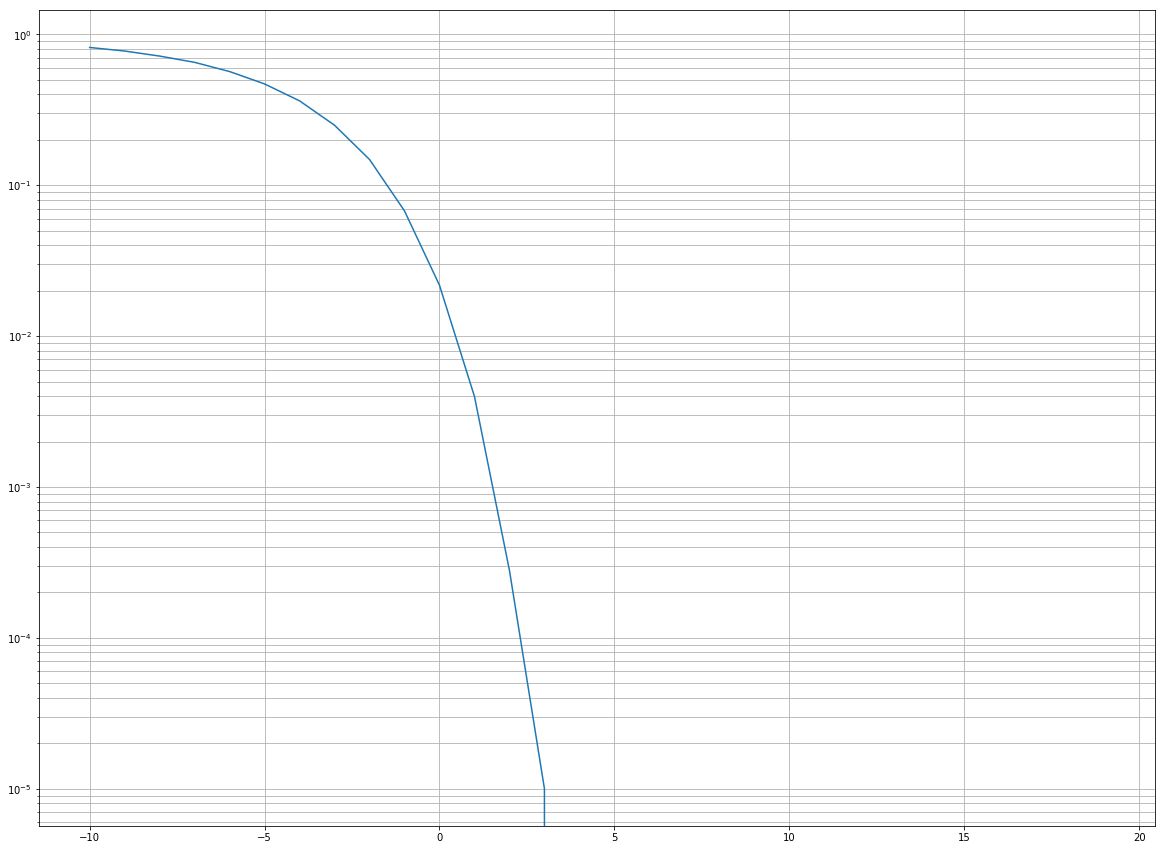

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.semilogy(snr,y)

plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')

In [46]:
snr = np.array(range(-10,20))
print(snr)
y = calculateBERfast(ch3, mmrc, decoder, generator2,snr,Nsymbols=10000,iterations = 10, verbose=True)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19]
30  threads will be created
Only the first thread will report it's state
Thread   0:   0% done
Thread   0:  10% done, elapsed time: 1s, expected time to completion: 109s
Thread   0:  20% done, elapsed time: 3s, expected time to completion: 115s
Thread   0:  30% done, elapsed time: 4s, expected time to completion: 95s
Thread   0:  40% done, elapsed time: 6s, expected time to completion: 81s
Thread   0:  50% done, elapsed time: 7s, expected time to completion: 66s
Thread   0:  60% done, elapsed time: 8s, expected time to completion: 52s
Thread   0:  70% done, elapsed time: 10s, expected time to completion: 42s
Thread   0:  80% done, elapsed time: 11s, expected time to completion: 25s
Thread   0:  90% done, elapsed time: 12s, expected time to completion: 14s
Thread  0  finished, elapsed time:  12 s


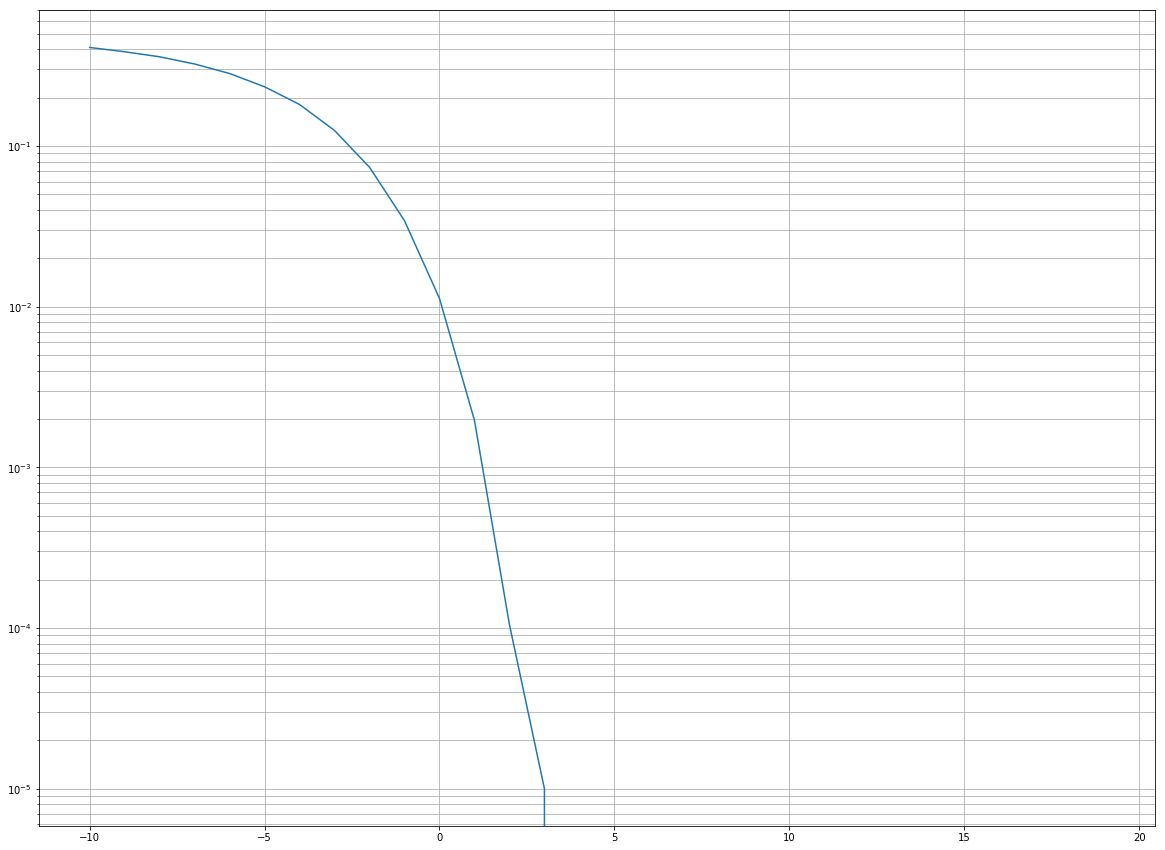

In [47]:
plt.figure(figsize=(20,15))
plt.semilogy(snr,y)

plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')

In [48]:
Rt = np.matrix([1])
Rr = np.matrix([1])

ch3 = KroneckerRayleighChannelMIMO(1,1, Rt, Rr)
mmrcSingle = MMRC(1,ch3)
                
y2 = calculateBERfast(ch3, mmrcSingle, decoder, generator2,snr,Nsymbols=10000,iterations = 10, verbose=True)

30  threads will be created
Only the first thread will report it's state
Thread   0:   0% done
Thread   0:  10% done, elapsed time: 1s, expected time to completion: 65s
Thread   0:  20% done, elapsed time: 2s, expected time to completion: 101s
Thread   0:  30% done, elapsed time: 4s, expected time to completion: 82s
Thread   0:  40% done, elapsed time: 6s, expected time to completion: 121s
Thread   0:  50% done, elapsed time: 8s, expected time to completion: 116s
Thread   0:  60% done, elapsed time: 9s, expected time to completion: 56s
Thread   0:  70% done, elapsed time: 11s, expected time to completion: 57s
Thread   0:  80% done, elapsed time: 15s, expected time to completion: 65s
Thread   0:  90% done, elapsed time: 17s, expected time to completion: 20s
Thread  0  finished, elapsed time:  17 s


In [49]:
Rt = np.matrix([1])
Rr = np.identity(5)

ch3 = KroneckerRayleighChannelMIMO(1,5, Rt, Rr)
mmrc5 = MMRC(5,ch3)
                


In [50]:
y3 = calculateBERfast(ch3, mmrc5, decoder, generator2,snr,Nsymbols=1000,iterations = 10, verbose=True)

30  threads will be created
Only the first thread will report it's state
Thread   0:   0% done
Thread   0:  10% done, elapsed time: 0s, expected time to completion: 7s
Thread   0:  20% done, elapsed time: 0s, expected time to completion: 12s
Thread   0:  30% done, elapsed time: 0s, expected time to completion: 10s
Thread   0:  40% done, elapsed time: 1s, expected time to completion: 9s
Thread   0:  50% done, elapsed time: 1s, expected time to completion: 7s
Thread   0:  60% done, elapsed time: 1s, expected time to completion: 6s
Thread   0:  70% done, elapsed time: 1s, expected time to completion: 5s
Thread   0:  80% done, elapsed time: 1s, expected time to completion: 3s
Thread   0:  90% done, elapsed time: 1s, expected time to completion: 2s
Thread  0  finished, elapsed time:  1 s


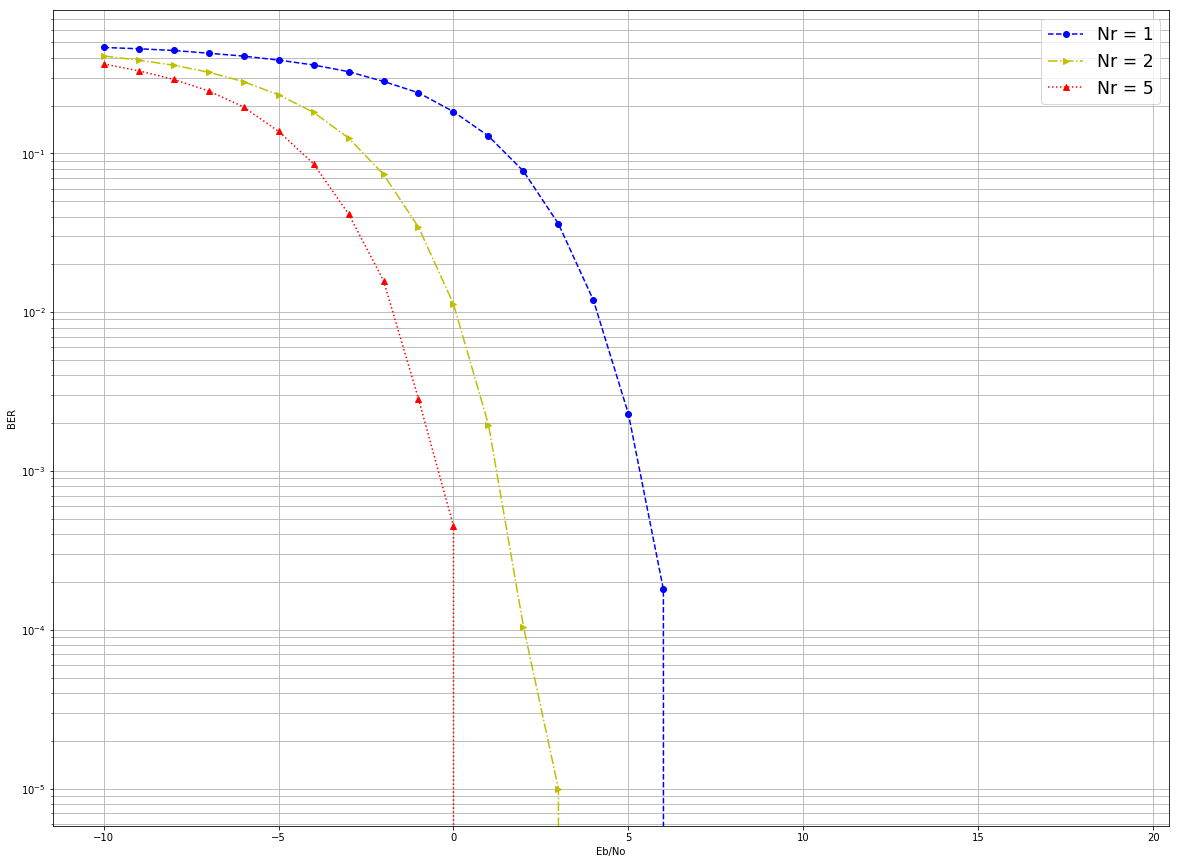

In [51]:
plt.figure(figsize=(20,15))

single = plt.semilogy(snr,y2,linestyle='--',marker='o', color='b', label='Nr = 1')
double = plt.semilogy(snr,y, linestyle='-.',marker='>', color='y', label='Nr = 2')
quintuple = plt.semilogy(snr,y3,linestyle=':',marker='^', color='r', label = 'Nr = 5')
plt.ylabel('BER')
plt.xlabel('Eb/No')
plt.legend(fontsize='xx-large')
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')

In [52]:
n = np.array([[1,2],[3,4]])
print('array: ', n)
print('sum: ', np.sum(n, axis=0))

array:  [[1 2]
 [3 4]]
sum:  [4 6]


In [53]:
n = np.array([[1,2],[3,4]])
n2 = np.array([[0.1,0.1],[0.1,0.1]])
AS = AntennaSelector(n,eveCh = n2)
print('SAS: ',AS.SuboptimalAntennaSelection())
print('OAS: ', AS.OptimalAntennaSelection())
print('LROAS: ', AS.LinearReceiverOptimalAntennaSet())

SAS:  1
OAS:  1
LROAS:  (1,)


In [54]:
print(isinstance(ch, Channel))

True


In [55]:
mu = 0
variance = 2
x = generator2.generate(10)
x + np.array(np.random.normal(mu,variance,x.shape) + 1j*np.random.normal(mu,variance,x.shape),dtype=complex)

array([-1.77201966-2.66715958j, -2.02690507+1.51383018j,
        0.74141455+2.8888168j , -0.88870899+0.54616579j,
       -0.89668701-1.8247782j ,  0.8885328 -1.7204547j ,
       -0.39674799-0.47216094j, -1.5842635 -3.82339576j,
       -0.23400164+4.70190594j, -0.53535574-3.63940495j])

In [56]:
np.array(x,dtype=complex) + np.array(np.random.normal(mu,variance,x.shape) + 1j*np.random.normal(mu,variance,x.shape),dtype=complex)

array([ 1.14810076-3.59158495j,  0.95895649-2.63017866j,
       -0.01403487+0.2221806j ,  2.45924074+3.55010148j,
       -0.62558377-1.57085544j,  1.00432901-3.30417465j,
        3.27047735+0.08072084j, -0.68438331-0.96537761j,
       -0.68884032+1.36918207j, -1.06094631+1.46102562j])

In [57]:
np.array(np.random.normal(mu,variance,x.shape) + 1j*np.random.normal(mu,variance,x.shape),dtype=complex)

array([-1.47352952+1.44325323j, -0.64278499+0.21257255j,
       -0.7412859 +1.4221937j , -2.16696071+0.66954555j,
       -0.63325529+1.68946383j,  1.99346845-0.97290325j,
       -4.82755198+1.73712728j, -3.4802234 -0.9797414j ,
        0.88202252+1.01640898j, -2.14890819-0.27458574j])

In [89]:
def generateOASdata(n,nt=1,nr=1,Rr=None,Rt=None):
    X = np.zeros((n,nt*nr*2), dtype=complex)
    y = np.zeros(n)
    
    if(Rr is None):
        Rr = np.identity(nr)
    if(Rt is None):
        Rt = np.identity(nt)
    for i in range(n):
        chU =  KroneckerRayleighChannelMIMO(nt,nr,Rt,Rr)
        chEve = KroneckerRayleighChannelMIMO(nt,nr,Rt,Rr)
        AS = AntennaSelector(chU,chEve)
        H1 = chU.getChannel().flatten()
        H2 = chEve.getChannel().flatten()
        H1 = H1.reshape(1,-1)
        H2 = H2.reshape(1,-1)
        X[i,:nt*nr] = H1
        X[i,nt*nr:] = H2
        y[i] = AS.OptimalAntennaSelection()
    return X,y

In [88]:
X,y = generateOASdata(10,1,2)

(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)


In [92]:
print(X.shape)
print(X[1,:])
print(y[1])

(10, 4)
[-0.38490642+1.73184064j  0.7424001 +0.45802652j  1.17822224-0.36621444j
 -0.16824706+0.29867202j]
0.0


In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

class MakeReal(BaseEstimator, TransformerMixin):
    def __init__(self, RealPart = True, ImaginaryPart=True, magnitude = False, Phase = False):
        self.real = RealPart
        self.imag = ImaginaryPart
        self.magnitude = magnitude
        self.phase = Phase
    def fit(self,X, y = None):
        return self
    def transform(self,X,y=None):
        c = 0
        if(self.real == True):
            c += 1
        if(self.imag == True):
            c += 1
        if(self.magnitude == True):
            c += 1
        if(self.phase == True):
            c += 1
        
        s = X.shape
        X_transformed = np.zeros((s[0], c*s[1]))
        print(X_transformed.shape)
        for i in range(s[1]):
            k = 0
            if(self.real == True):
                X_transformed[:,c*i + k] = np.real(X[:,i])
                k+= 1
            if(self.imag == True):
                X_transformed[:,c*i+k] = np.imag(X[:,i])
                k+= 1
            if(self.magnitude == True):
                X_transformed[:,c*i+k] = np.absolute(X[:,i])
                k += 1
            if(self.phase == True):
                X_transformed[:,c*i+k] = np.angle(X[:,i])
                k += 1
        
        return X_transformed

In [114]:
mr = MakeReal()
mr.transform(X[1:2,:])

(1, 8)


array([[-0.38490642,  1.73184064,  0.7424001 ,  0.45802652,  1.17822224,
        -0.36621444, -0.16824706,  0.29867202]])

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

data_prep_pipeline = Pipeline([
    ('toReal', MakeReal()),
    ('stdScaler', StandardScaler()),
])

In [119]:
X_train = data_prep_pipeline.fit(X)

(10, 8)
